### Final Project
### Lane Whitmore, Grigor Tashchyan & Elsie Cha
### Online_Shoppers_Intentions Data

## Step 1: Data Importing and Pre-processing

In [2]:
## Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
## Import Dataset
online_shoppers = pd.read_csv('online_shoppers_intention.csv')

In [4]:
## Data population count, Data type, Column Names, and Column non-null counts
online_shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
## Sum of nulls in each column
online_shoppers.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [6]:
## Dropping all null values in the dataframe
online_shoppers2 = online_shoppers.dropna()

In [7]:
## No null values left
online_shoppers2.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
## New count of dataframe rows without null values
online_shoppers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11948 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11948 non-null  int64  
 1   Administrative_Duration  11948 non-null  float64
 2   Informational            11948 non-null  float64
 3   Informational_Duration   11948 non-null  float64
 4   ProductRelated           11948 non-null  int64  
 5   ProductRelated_Duration  11948 non-null  float64
 6   BounceRates              11948 non-null  float64
 7   ExitRates                11948 non-null  float64
 8   PageValues               11948 non-null  float64
 9   SpecialDay               11948 non-null  float64
 10  Month                    11948 non-null  object 
 11  OperatingSystems         11948 non-null  float64
 12  Browser                  11948 non-null  int64  
 13  Region                   11948 non-null  int64  
 14  TrafficType           

In [9]:
## Correlation coefficients of entire dataframe
online_shoppers2.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600754,0.375596,0.252994,0.431546,0.373156,-0.223590,-0.316863,0.100557,-0.096080,-0.005402,-0.025455,-0.006298,-0.035579,0.026352,0.135952
Administrative_Duration,0.600754,1.000000,0.304381,0.237804,0.282033,0.349988,-0.144181,-0.205944,0.068568,-0.074007,-0.005876,-0.016405,-0.006057,-0.014633,0.015788,0.094233
Informational,0.375596,0.304381,1.000000,0.620939,0.372117,0.385171,-0.115557,-0.162756,0.049362,-0.047828,-0.009132,-0.037610,-0.031193,-0.032844,0.035363,0.093283
Informational_Duration,0.252994,0.237804,0.620939,1.000000,0.278086,0.346209,-0.073685,-0.104754,0.030828,-0.031074,-0.011211,-0.018135,-0.027054,-0.024821,0.025549,0.068343
ProductRelated,0.431546,0.282033,0.372117,0.278086,1.000000,0.858554,-0.205159,-0.293363,0.057793,-0.023230,0.004172,-0.012282,-0.036832,-0.041486,0.017989,0.158680
ProductRelated_Duration,0.373156,0.349988,0.385171,0.346209,0.858554,1.000000,-0.184830,-0.252187,0.053341,-0.035933,0.003302,-0.006535,-0.032084,-0.035216,0.008181,0.151999
BounceRates,-0.223590,-0.144181,-0.115557,-0.073685,-0.205159,-0.184830,1.000000,0.912493,-0.119426,0.073773,0.023029,-0.014942,-0.005414,0.076258,-0.045190,-0.150647
ExitRates,-0.316863,-0.205944,-0.162756,-0.104754,-0.293363,-0.252187,0.912493,1.000000,-0.174923,0.102838,0.014349,-0.003408,-0.009137,0.076320,-0.061746,-0.207411
PageValues,0.100557,0.068568,0.049362,0.030828,0.057793,0.053341,-0.119426,-0.174923,1.000000,-0.065493,0.018913,0.045691,0.012119,0.015032,0.011003,0.491841
SpecialDay,-0.096080,-0.074007,-0.047828,-0.031074,-0.023230,-0.035933,0.073773,0.102838,-0.065493,1.000000,0.012672,0.003063,-0.017260,0.051794,-0.017314,-0.084763


In [10]:
## Basic information on the dataframe including; mean, standard deviation, min, max, and quartiles. 
online_shoppers2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000
mean,2.314195,80.975454,0.502343,34.571237,31.661952,1192.344645,0.022163,0.043053,5.938418,0.061383,2.124540,2.357884,3.143873,4.068966
std,3.318662,176.278338,1.270053,141.688119,44.245077,1907.556355,0.048451,0.048577,18.719907,0.198728,0.912818,1.722570,2.399180,4.027186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.075000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.112500,0.000000,0.000000,18.000000,599.216667,0.003107,0.025109,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.000000,0.000000,0.000000,38.000000,1461.752083,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [30]:
## Making Revenue in its own dataframe True = 1 and Revenue False = 0 
revenue_df = online_shoppers2['Revenue'].astype(int)

## Step 1 Summary:


## Step 2: Data Analysis and Visualization

In [11]:
## Revenue True/False distribution. True = Revenue. False = No Revenue
online_shoppers2['Revenue'].value_counts()

False    10097
True      1851
Name: Revenue, dtype: int64

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


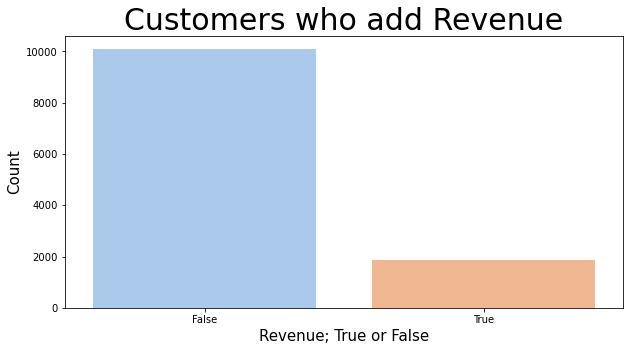

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['Revenue'], palette = 'pastel')
plt.title('Customers who add Revenue', fontsize = 30)
plt.xlabel('Revenue; True or False', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [13]:
## Weekend True/False Distribution. True = Weekend. False = Weekday.
online_shoppers2['Weekend'].value_counts()

False    9176
True     2772
Name: Weekend, dtype: int64

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


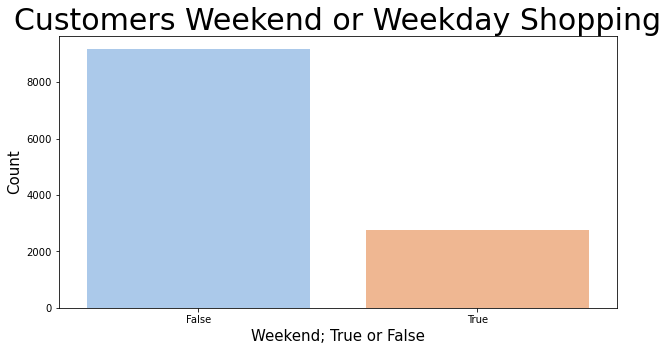

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['Weekend'], palette = 'pastel')
plt.title('Customers Weekend or Weekday Shopping', fontsize = 30)
plt.xlabel('Weekend; True or False', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

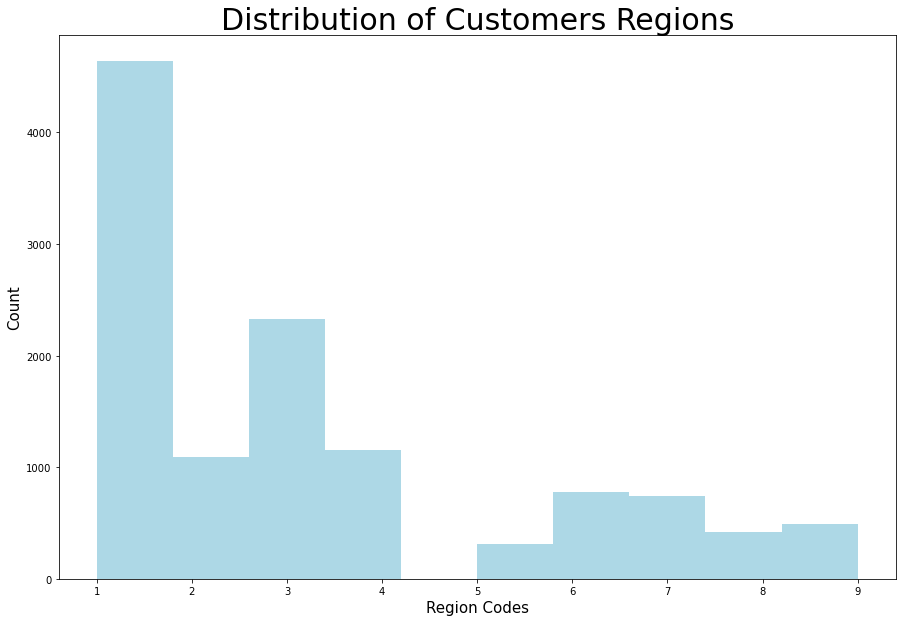

In [15]:
## Region distibution where region is coded 1-9
plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(online_shoppers2['Region'], color = 'lightblue')
plt.title('Distribution of Customers Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

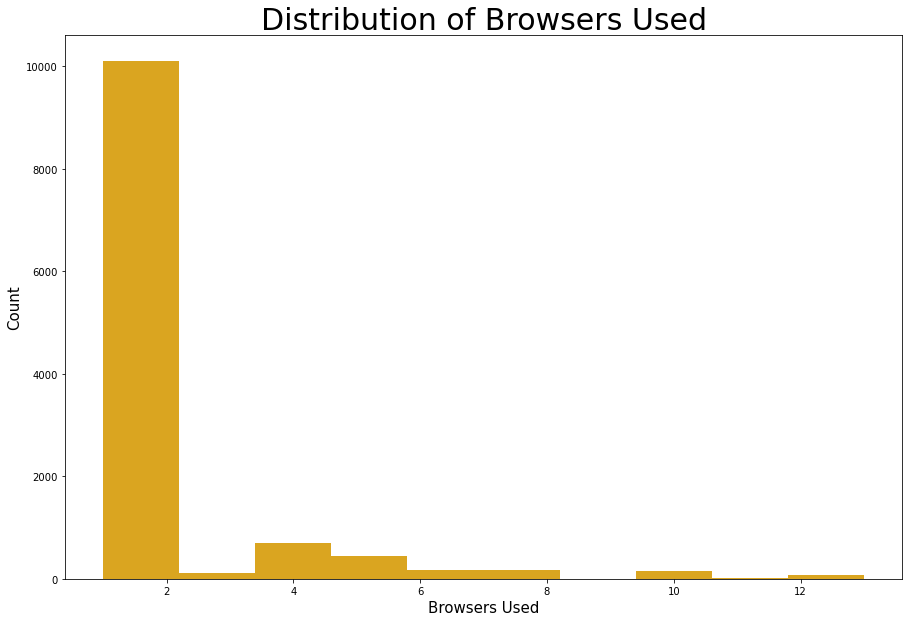

In [16]:
## Distibution of the number of browsers used
plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(online_shoppers2['Browser'], color = 'goldenrod')
plt.title('Distribution of Browsers Used',fontsize = 30)
plt.xlabel('Browsers Used', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

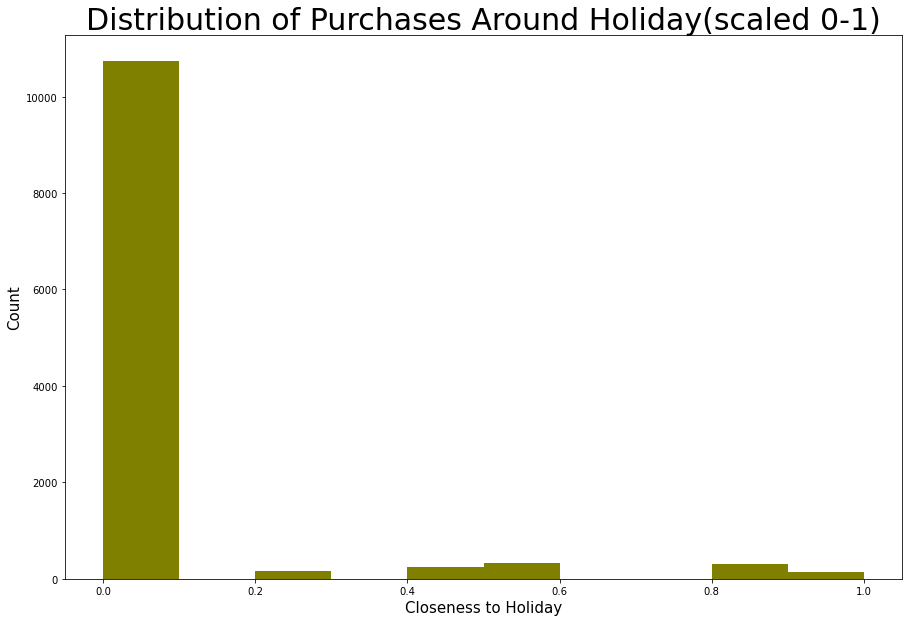

In [17]:
## Distribution of closeness to Holiday based on scaled closeness 0-1 within one week either side of the holiday.
plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(online_shoppers2['SpecialDay'], color = 'olive')
plt.title('Distribution of Purchases Around Holiday(scaled 0-1)',fontsize = 30)
plt.xlabel('Closeness to Holiday', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


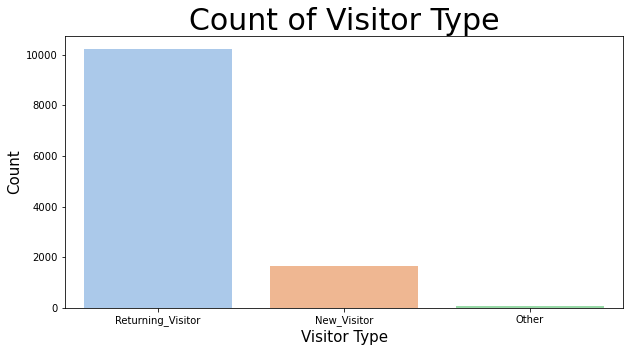

In [18]:
## Distribution of Visitor Type
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['VisitorType'], palette = 'pastel')
plt.title('Count of Visitor Type', fontsize = 30)
plt.xlabel('Visitor Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


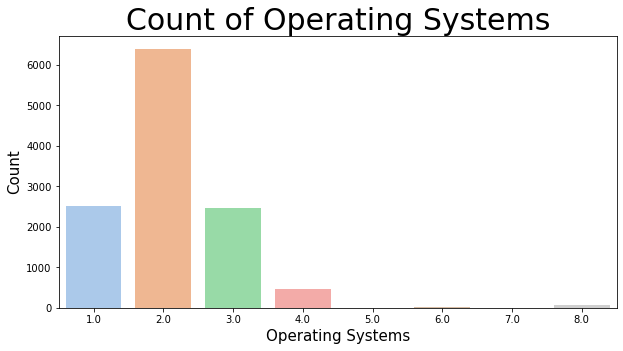

In [19]:
## Distribution of Operating Systems.
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['OperatingSystems'], palette = 'pastel')
plt.title('Count of Operating Systems', fontsize = 30)
plt.xlabel('Operating Systems', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


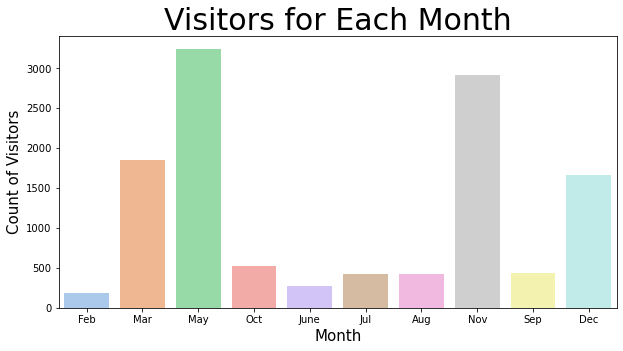

In [20]:
## Distribution of Visitors each month
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['Month'], palette = 'pastel')
plt.title('Visitors for Each Month', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count of Visitors', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


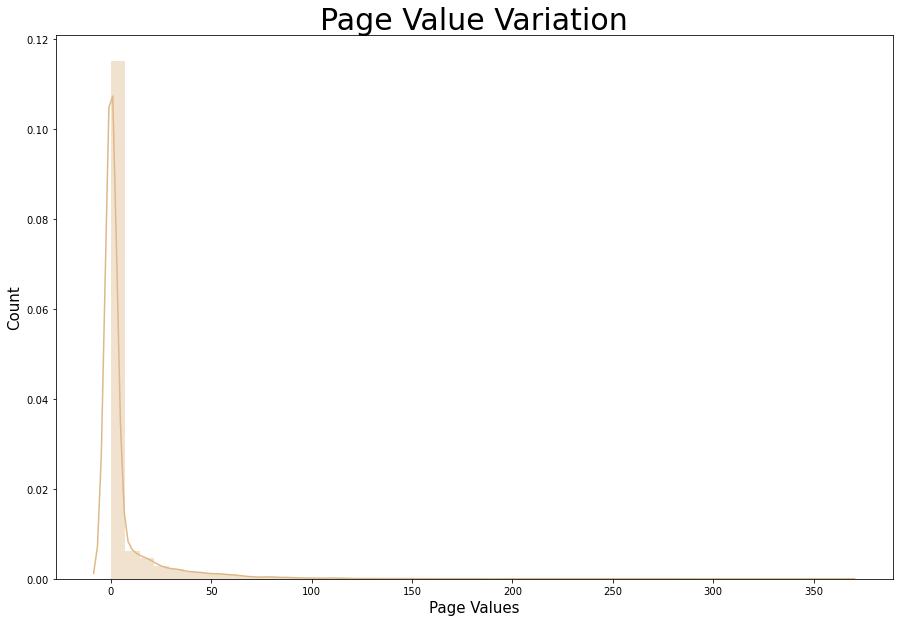

In [21]:
## Page Value Variation
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(online_shoppers2['PageValues'], color = 'burlywood')
plt.title('Page Value Variation', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


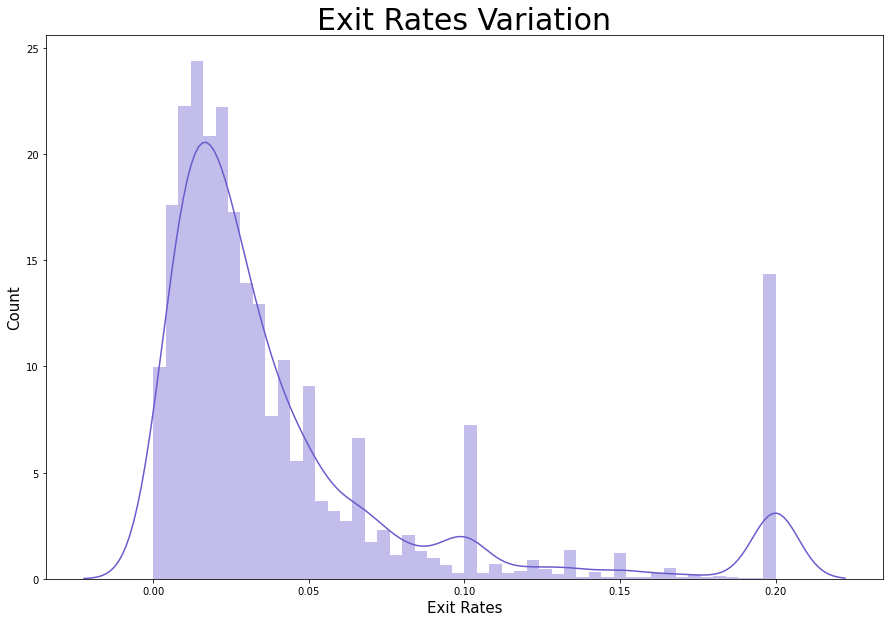

In [22]:
## Exit Rates Variation
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(online_shoppers2['ExitRates'], color = 'slateblue')
plt.title('Exit Rates Variation', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


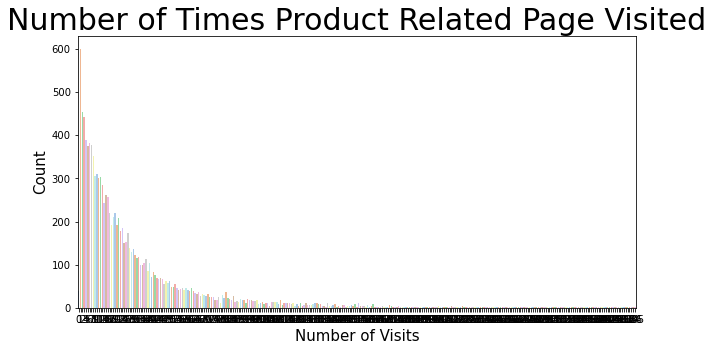

In [23]:
## Distribution of Product Related Visits
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['ProductRelated'], palette = 'pastel')
plt.title('Number of Times Product Related Page Visited', fontsize = 30)
plt.xlabel('Number of Visits', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


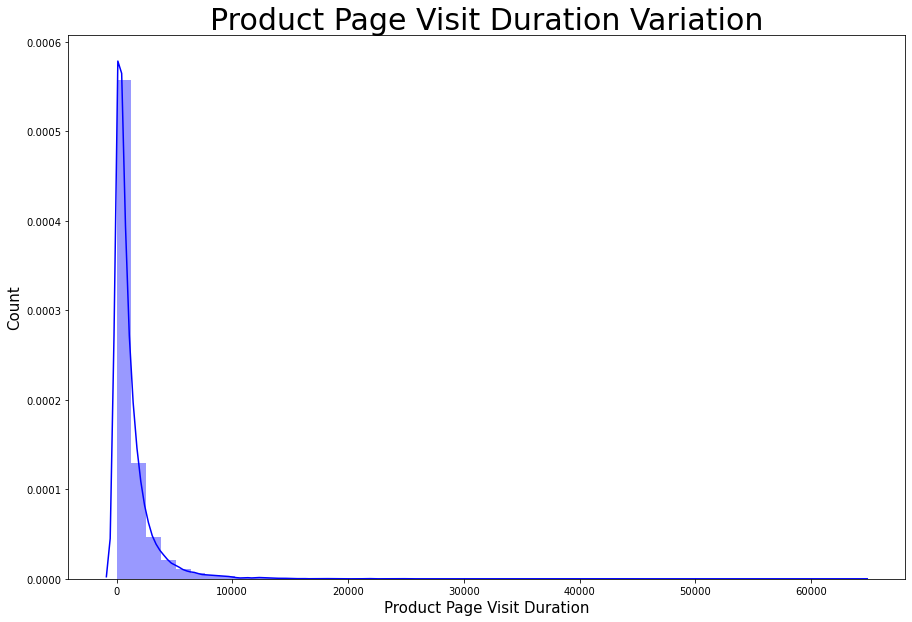

In [24]:
## Product Page Visit Duration Variation
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(online_shoppers2['ProductRelated_Duration'], color = 'blue')
plt.title('Product Page Visit Duration Variation', fontsize = 30)
plt.xlabel('Product Page Visit Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


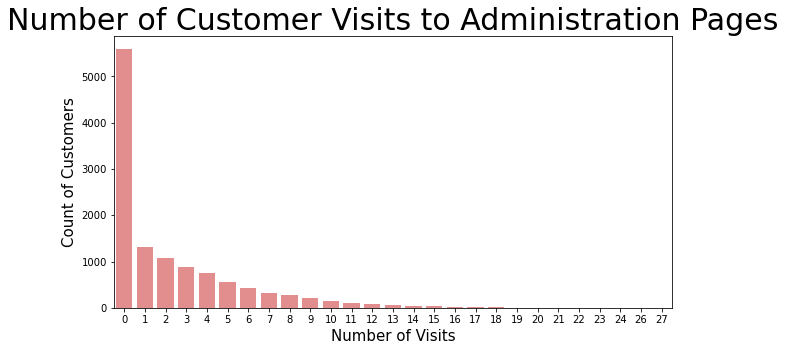

In [25]:
## Distribution of Customer Visits to Administration Pages
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(online_shoppers2['Administrative'], color = 'lightcoral')
plt.title('Number of Customer Visits to Administration Pages', fontsize = 30)
plt.xlabel('Number of Visits', fontsize = 15)
plt.ylabel('Count of Customers', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


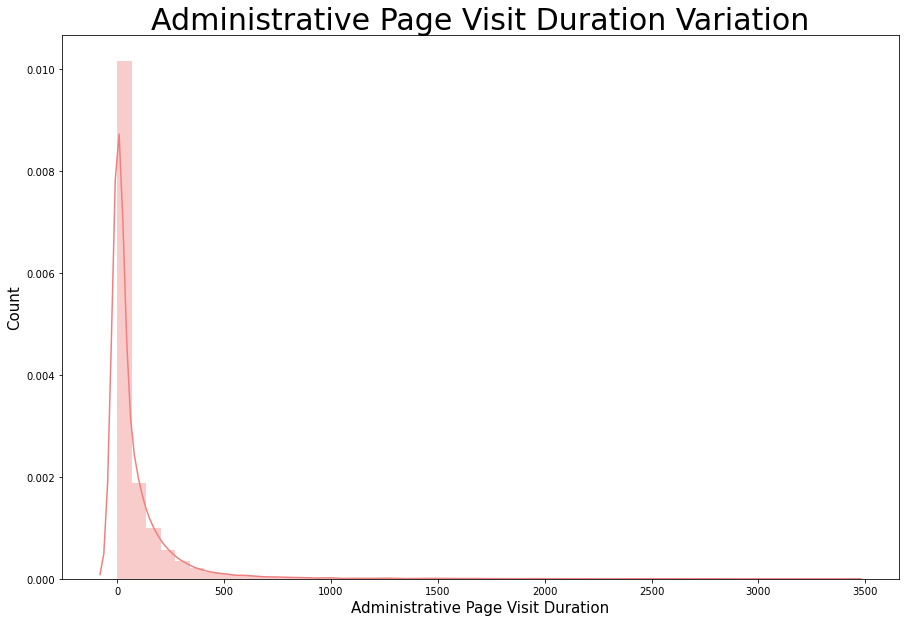

In [26]:
## Administrative page duration variation
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(online_shoppers2['Administrative_Duration'], color = 'lightcoral')
plt.title('Administrative Page Visit Duration Variation', fontsize = 30)
plt.xlabel('Administrative Page Visit Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

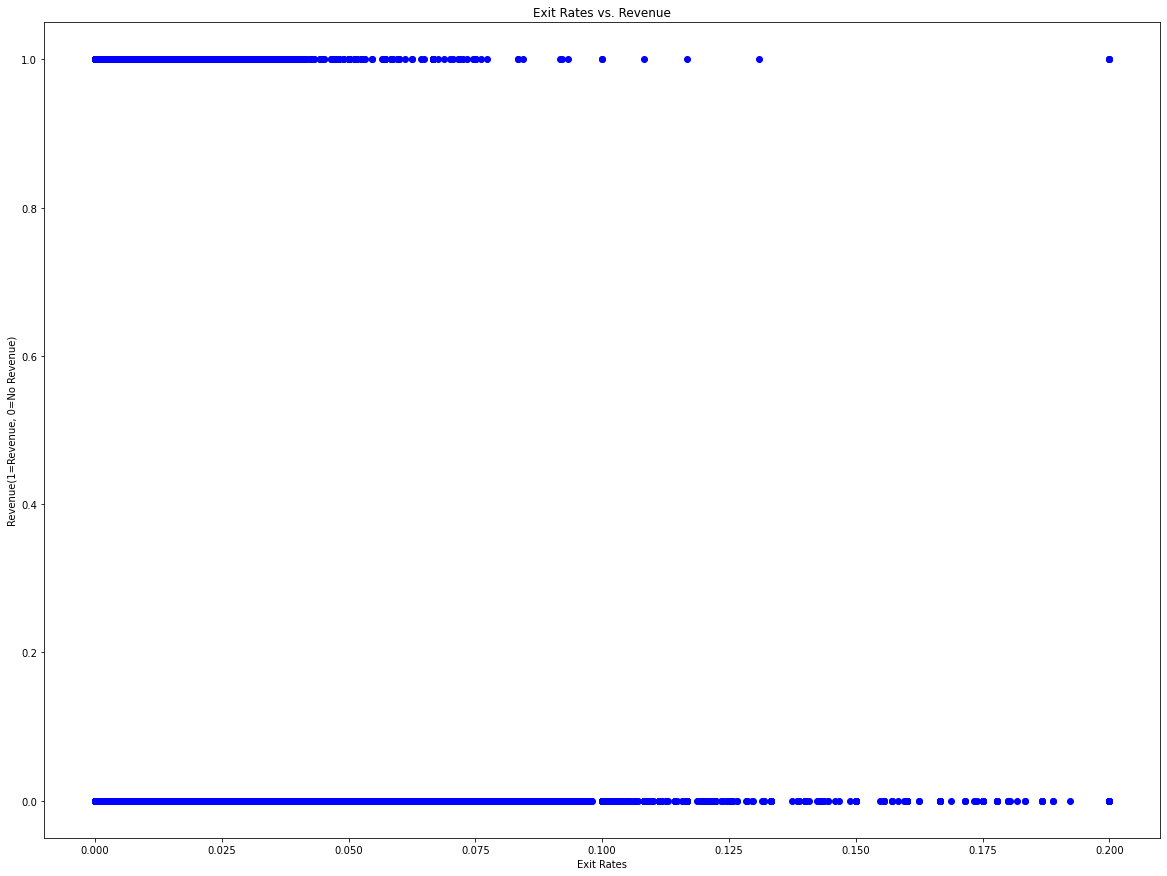

In [41]:
plt.scatter(online_shoppers2['ExitRates'], revenue_df, color = 'blue')
plt.title('Exit Rates vs. Revenue')
plt.xlabel('Exit Rates')
plt.ylabel('Revenue(1=Revenue, 0=No Revenue)')
plt.show()

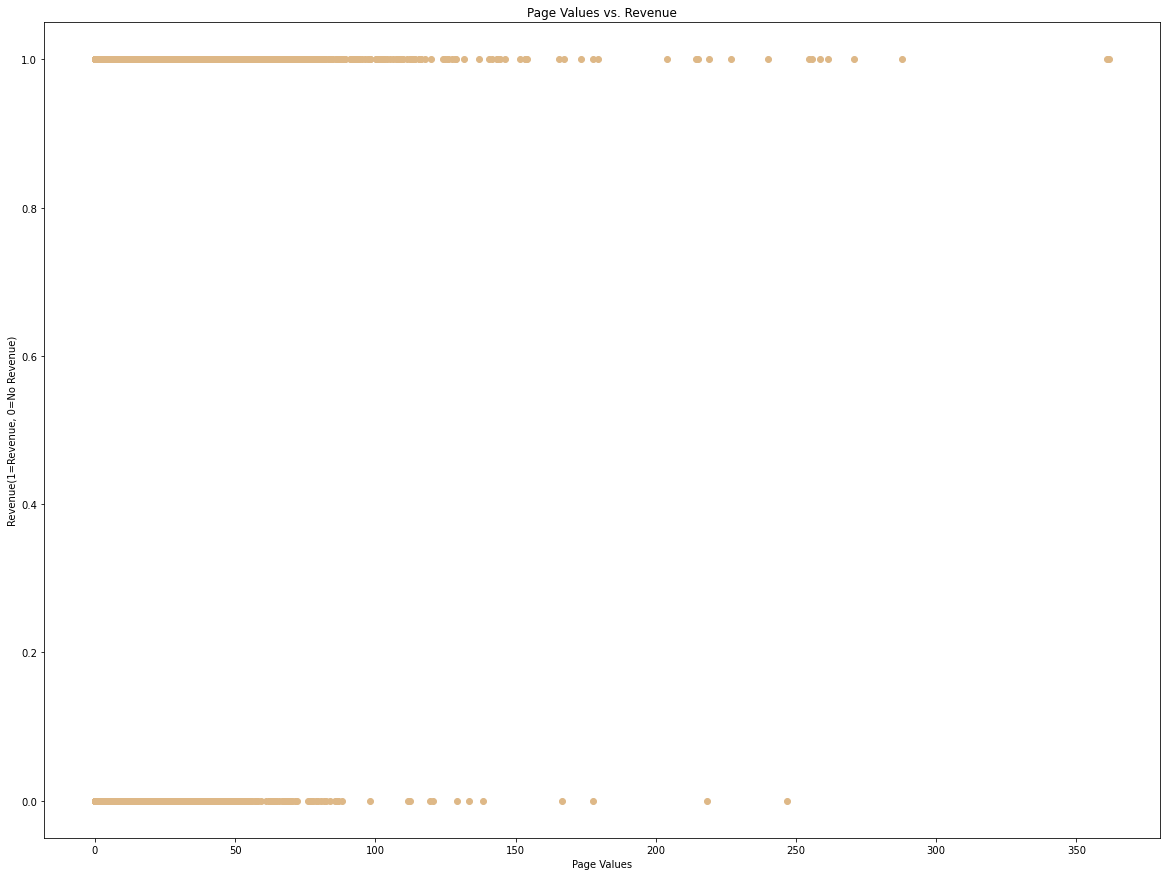

In [43]:
plt.scatter(online_shoppers2['PageValues'], revenue_df, color = 'burlywood')
plt.title('Page Values vs. Revenue')
plt.xlabel('Page Values')
plt.ylabel('Revenue(1=Revenue, 0=No Revenue)')
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


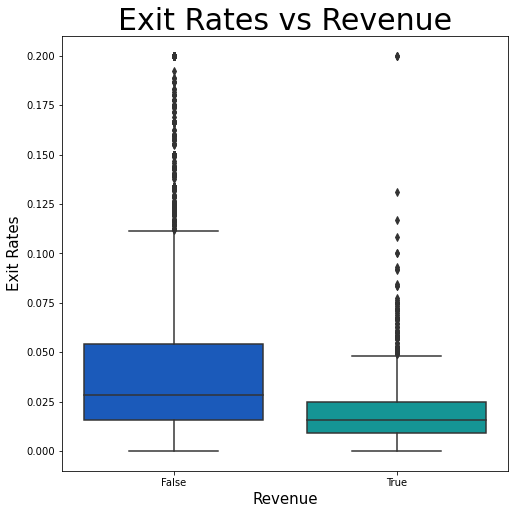

In [34]:
## Exit Rate Boxplots sorted by Revenue True/False
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(online_shoppers2['Revenue'], online_shoppers2['ExitRates'], palette = 'winter')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Exit Rates', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


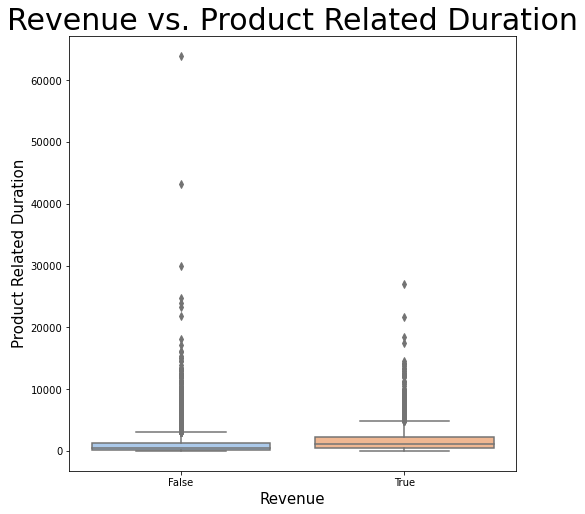

In [35]:
## Product Related Duration Boxplot sorted by Revenue True/False
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(online_shoppers2['Revenue'], online_shoppers2['ProductRelated_Duration'], palette = 'pastel')
plt.title('Revenue vs. Product Related Duration', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Product Related Duration', fontsize = 15)
plt.show()

C:\Users\Lane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


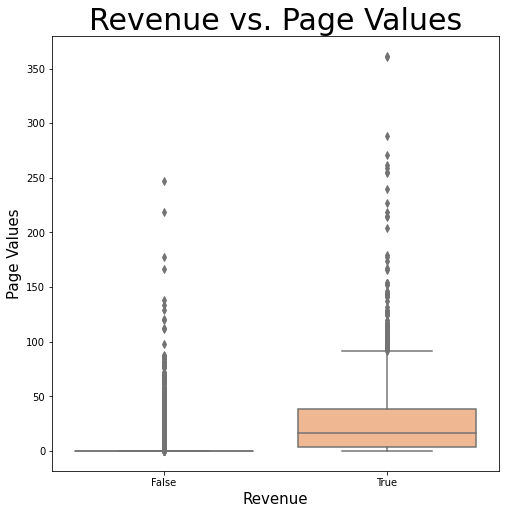

In [36]:
## Page Values boxplots sorted by Revenue True/False
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(online_shoppers2['Revenue'], online_shoppers2['PageValues'], palette = 'pastel')
plt.title('Revenue vs. Page Values', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Page Values', fontsize = 15)
plt.show()

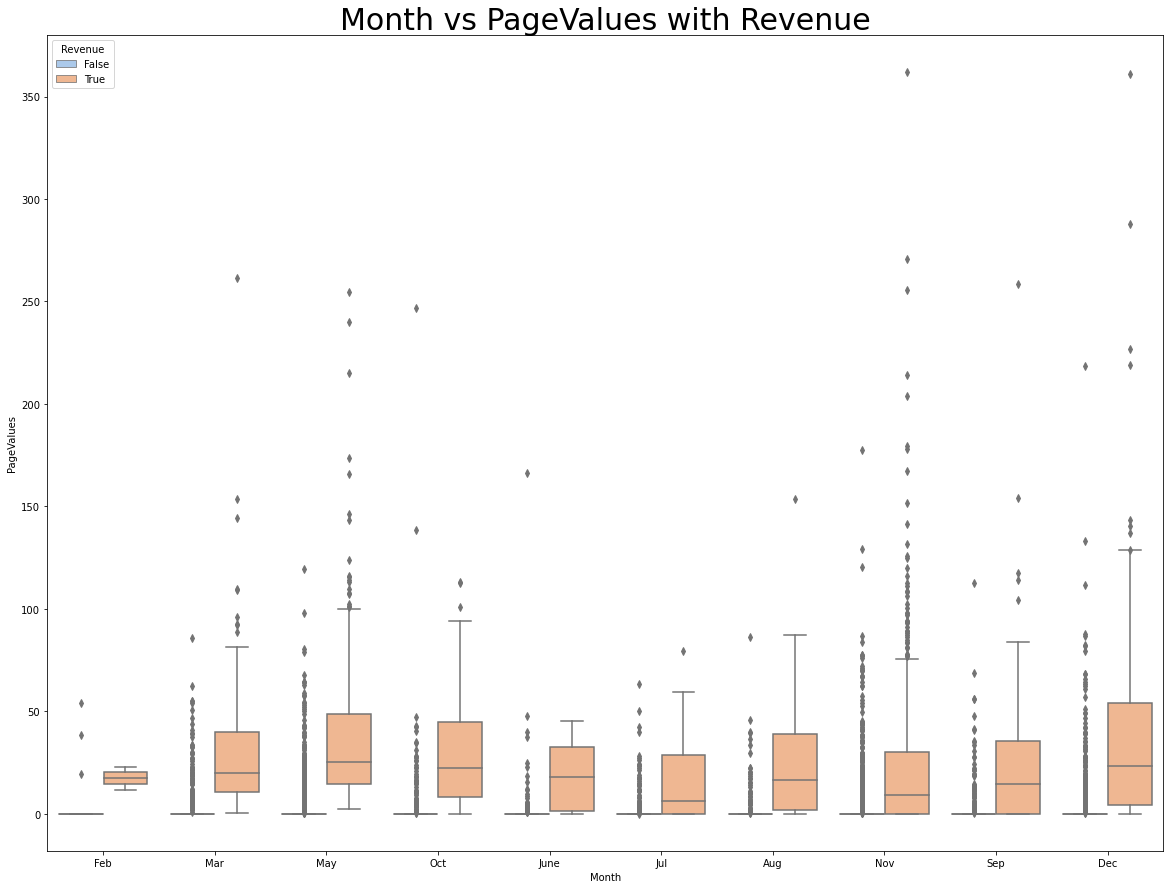

In [37]:
## Page Values boxplots sorted by month and Revenue True/False
plt.rcParams['figure.figsize'] = (20, 15)
sns.boxplot(x = online_shoppers2['Month'], y = online_shoppers2['PageValues'], hue = online_shoppers2['Revenue'], palette = 'pastel')
plt.title('Month vs PageValues with Revenue', fontsize = 30)
plt.show()

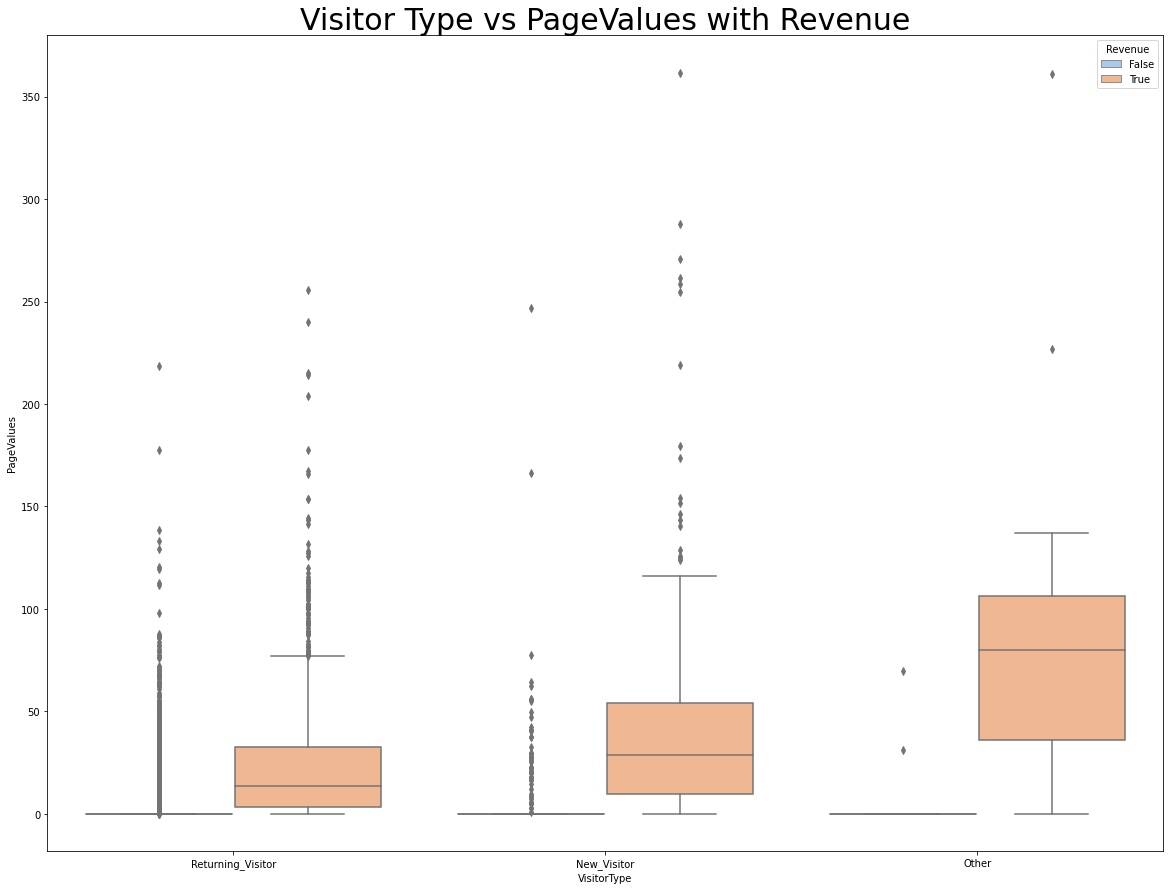

In [38]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.boxplot(x = online_shoppers2['VisitorType'], y = online_shoppers2['PageValues'], hue = online_shoppers2['Revenue'], palette = 'pastel')
plt.title('Visitor Type vs PageValues with Revenue', fontsize = 30)
plt.show()

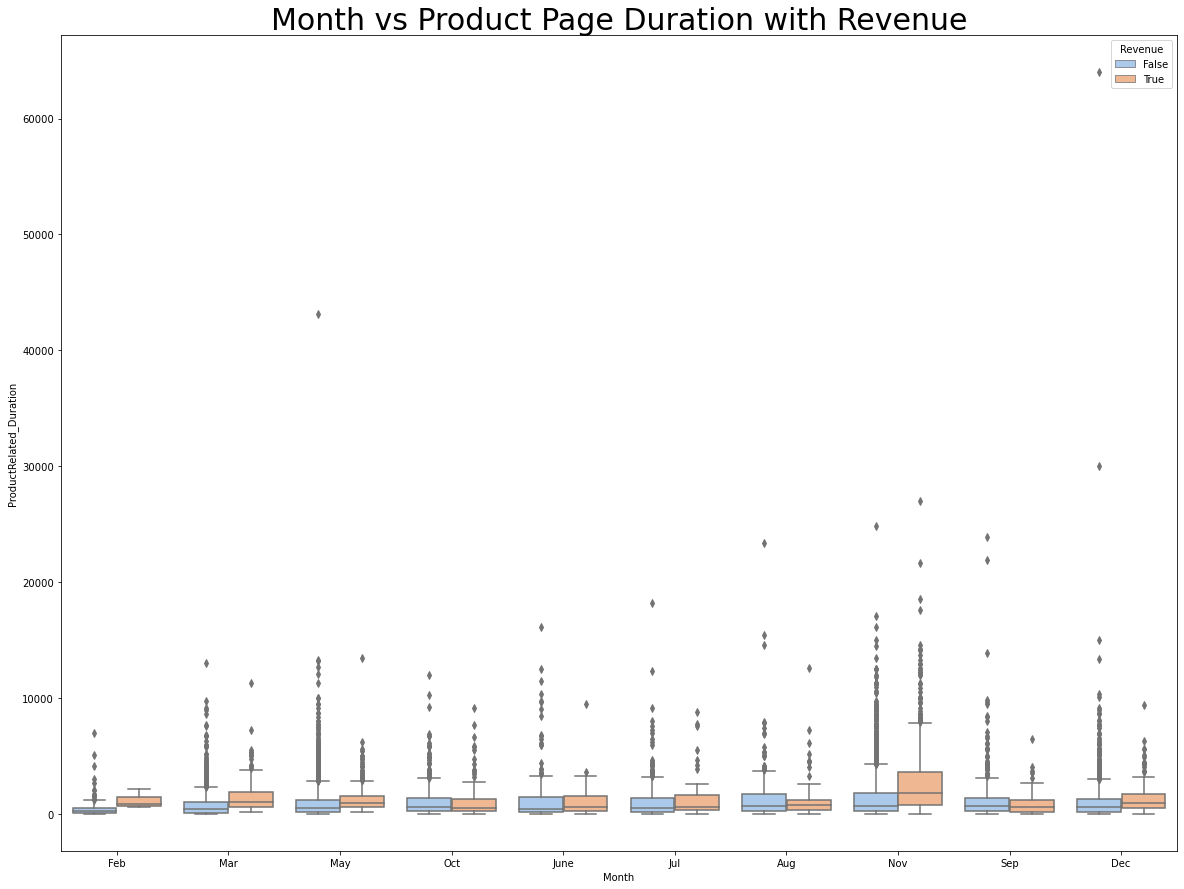

In [39]:
## Product Page Duration boxplots sorted by Revenue and Month
plt.rcParams['figure.figsize'] = (20, 15)
sns.boxplot(x = online_shoppers2['Month'], y = online_shoppers2['ProductRelated_Duration'], hue = online_shoppers2['Revenue'], palette = 'pastel')
plt.title('Month vs Product Page Duration with Revenue', fontsize = 30)
plt.show()

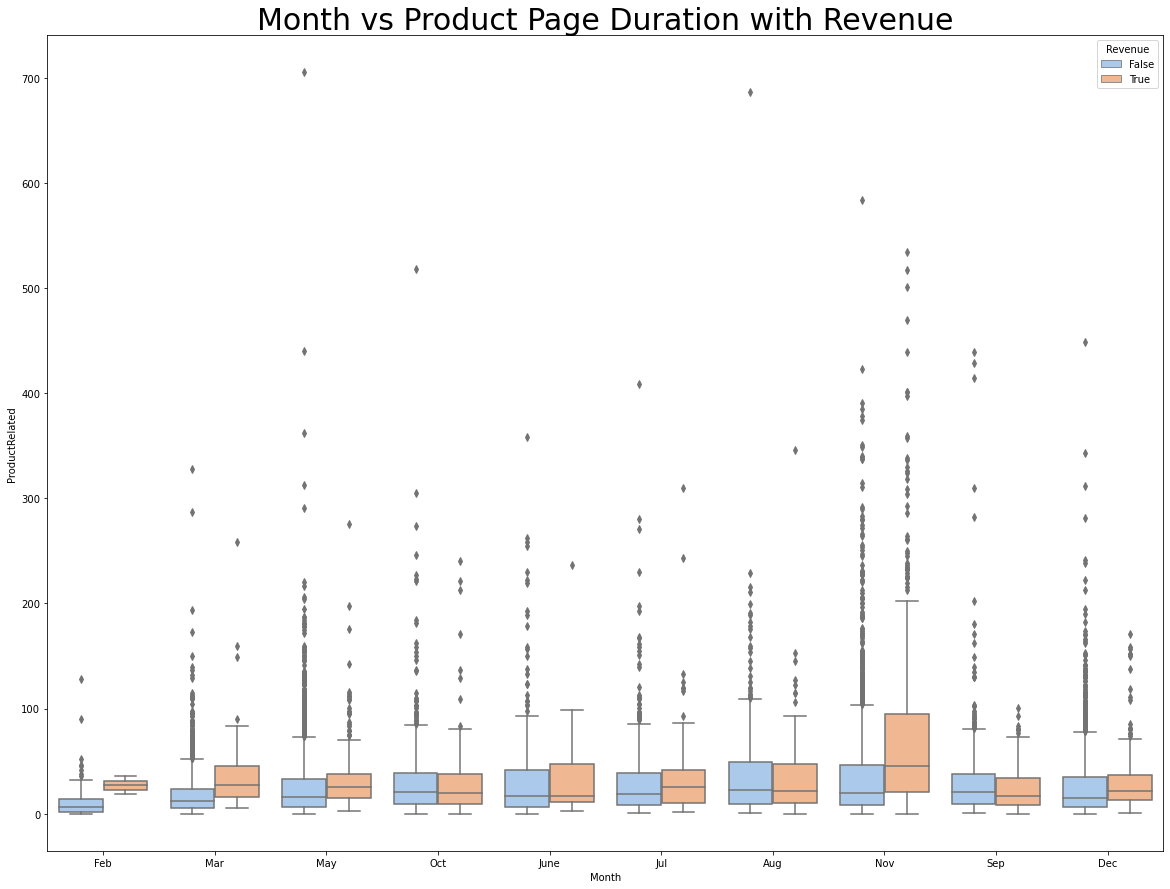

In [40]:
## Product Page Duration boxplots sorted by Month and Revenue
plt.rcParams['figure.figsize'] = (20, 15)
sns.boxplot(x = online_shoppers2['Month'], y = online_shoppers2['ProductRelated'], hue = online_shoppers2['Revenue'], palette = 'pastel')
plt.title('Month vs Product Page Duration with Revenue', fontsize = 30)
plt.show()

## Step 2 Summary:


## Step 3: Data Analytics

In [44]:
## Creating Dummy Values for both Month and Visitor Type
online_shoppers3 = pd.get_dummies(online_shoppers2)

online_shoppers3.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [45]:
## Dataframe Correlation
online_shoppers2.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600754,0.375596,0.252994,0.431546,0.373156,-0.223590,-0.316863,0.100557,-0.096080,-0.005402,-0.025455,-0.006298,-0.035579,0.026352,0.135952
Administrative_Duration,0.600754,1.000000,0.304381,0.237804,0.282033,0.349988,-0.144181,-0.205944,0.068568,-0.074007,-0.005876,-0.016405,-0.006057,-0.014633,0.015788,0.094233
Informational,0.375596,0.304381,1.000000,0.620939,0.372117,0.385171,-0.115557,-0.162756,0.049362,-0.047828,-0.009132,-0.037610,-0.031193,-0.032844,0.035363,0.093283
Informational_Duration,0.252994,0.237804,0.620939,1.000000,0.278086,0.346209,-0.073685,-0.104754,0.030828,-0.031074,-0.011211,-0.018135,-0.027054,-0.024821,0.025549,0.068343
ProductRelated,0.431546,0.282033,0.372117,0.278086,1.000000,0.858554,-0.205159,-0.293363,0.057793,-0.023230,0.004172,-0.012282,-0.036832,-0.041486,0.017989,0.158680
ProductRelated_Duration,0.373156,0.349988,0.385171,0.346209,0.858554,1.000000,-0.184830,-0.252187,0.053341,-0.035933,0.003302,-0.006535,-0.032084,-0.035216,0.008181,0.151999
BounceRates,-0.223590,-0.144181,-0.115557,-0.073685,-0.205159,-0.184830,1.000000,0.912493,-0.119426,0.073773,0.023029,-0.014942,-0.005414,0.076258,-0.045190,-0.150647
ExitRates,-0.316863,-0.205944,-0.162756,-0.104754,-0.293363,-0.252187,0.912493,1.000000,-0.174923,0.102838,0.014349,-0.003408,-0.009137,0.076320,-0.061746,-0.207411
PageValues,0.100557,0.068568,0.049362,0.030828,0.057793,0.053341,-0.119426,-0.174923,1.000000,-0.065493,0.018913,0.045691,0.012119,0.015032,0.011003,0.491841
SpecialDay,-0.096080,-0.074007,-0.047828,-0.031074,-0.023230,-0.035933,0.073773,0.102838,-0.065493,1.000000,0.012672,0.003063,-0.017260,0.051794,-0.017314,-0.084763


In [46]:
## Chosen Model Values Correlation
online_shoppers3.loc[:,['Revenue','Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep','PageValues','ProductRelated','ExitRates']].corr()

,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,PageValues,ProductRelated,ExitRates
Revenue,1.000000,0.012059,-0.032691,-0.047256,-0.000278,-0.024655,-0.064969,-0.077717,0.153648,0.033071,0.020464,0.491841,0.158680,-0.207411
Month_Aug,0.012059,1.000000,-0.076995,-0.023665,-0.036568,-0.029533,-0.081900,-0.116790,-0.108846,-0.041103,-0.037459,-0.000966,0.030988,-0.021859
Month_Dec,-0.032691,-0.076995,1.000000,-0.049766,-0.076901,-0.062106,-0.172233,-0.245604,-0.228898,-0.086437,-0.078774,0.020971,-0.033857,-0.013681
Month_Feb,-0.047256,-0.023665,-0.049766,1.000000,-0.023636,-0.019089,-0.052936,-0.075487,-0.070352,-0.026567,-0.024212,-0.033221,-0.058068,0.079108
Month_Jul,-0.000278,-0.036568,-0.076901,-0.023636,1.000000,-0.029496,-0.081800,-0.116647,-0.108712,-0.041052,-0.037413,-0.017894,0.012264,0.009148
Month_June,-0.024655,-0.029533,-0.062106,-0.019089,-0.029496,1.000000,-0.066063,-0.094205,-0.087797,-0.033154,-0.030215,-0.020103,0.015974,0.048617
Month_Mar,-0.064969,-0.081900,-0.172233,-0.052936,-0.081800,-0.066063,1.000000,-0.261251,-0.243479,-0.091944,-0.083793,-0.044111,-0.114255,0.014445
Month_May,-0.077717,-0.116790,-0.245604,-0.075487,-0.116647,-0.094205,-0.261251,1.000000,-0.347203,-0.131112,-0.119489,-0.015396,-0.070815,0.071811
Month_Nov,0.153648,-0.108846,-0.228898,-0.070352,-0.108712,-0.087797,-0.243479,-0.347203,1.000000,-0.122193,-0.111361,0.037689,0.180835,-0.057185
Month_Oct,0.033071,-0.041103,-0.086437,-0.026567,-0.041052,-0.033154,-0.091944,-0.131112,-0.122193,1.000000,-0.042052,0.031513,0.011471,-0.062948


Dummy variables were created to have month represented within the model as there is a positive correlation between Page Values and Revenue, the strongest within the dataset, and the Page Values, Months, and Revenue boxplots above shows that month does effect the distribution across the year. Months like November showed to have higher than average overall distibutions of page values than other months. Yet, the dummy variable month and ExitRates both have very slight individual correlations to Revenue. The correlation to each each other is extremely minimal, so, within the model there is little multicollinearity concerns.

In [48]:
## Making Revenue True = 1 and Revenue False = 0 for Binary Logistic Model
revenue_df = online_shoppers2['Revenue'].astype(int)

To predict whether a page visit will create revenue, revenue must be translated from True/False to binary 1/0.

In [49]:
## Creating Dependent y and predictor x
y = revenue_df
x = online_shoppers3[['PageValues','ExitRates','Month_Aug','Month_Dec','Month_Feb','Month_Jul','Month_June','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']]

In [50]:
## Shape of both the dependent variable, y, and our predictor variables, x.
print(x.shape)
print(y.shape)

(11948, 12)
(11948,)


In [51]:
## Splitting the dataframe into 80% to train the model and 20% to test the model after. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [52]:
## Creating Logit Model using y_train and x_train(both 80%) frome above
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.295769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                 9558
Model:                          Logit   Df Residuals:                     9546
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.3160
Time:                        13:48:12   Log-Likelihood:                -2827.0
converged:                       True   LL-Null:                       -4133.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PageValues     0.0795      0.003     30.156      0.000       0.074       0.085
ExitRates    -20.7032      1.835    -11.282      0.000     -24.300     -17.107
Month_Aug     -1.6725      0.181     -9.247      0.000      -2.027      -1.318
Month_Dec     -2.2585      0.122    -18.542      0.000      -2.497      -2.020
Month_Feb     -3.1395      0.605     -5.191      0.000      -4.325      -1.954
Month_Jul     -1.6851      0.192     -8.795      0.000      -2.061      -1.310
Month_June    -2.0011      0.254     -7.890      0.000      -2.498      -1.504
Month_Mar     -2.2708      0.117    -19.491      0.000      -2.499      -2.042
Month_May     -2.2050      0.095    -23.249      0.000      -2.391      -2.019
Month_Nov     -1.0659      0.073    -14.530      0.000      -1.210      -0.922
Month_Oct     -1.5821      0.151    -10.463      0.000      -1.878      -1.286
Month_Sep     -1.6354      0.174     -9.382      0.000      -1.977      -1.294
==============================================================================
"""

In [53]:
## Rounding the model prediction results so that >= .5 is 1 and < .5 is 0.
predicted = result.predict(x_test)
ypred = (predicted >= .5).astype(int)

In [54]:
## Accuracy Score of the Model
accuracy_score(y_test, ypred)

0.8845188284518829

In [55]:
## Brier Score of Model
loss = metrics.brier_score_loss(y_test,ypred)
loss

0.11548117154811716

## Step 3 Summary: 

After training the Logistic Regression Model, the results show that the model has performed very well. The Psuedo R-squared of the model is right in between the preferred 0.2-0.4 at 0.3213. Meaning the model appears to fit. Each predictor has a p-value less than 0.0001 and a standard error less than 2, ExitRates being the only predictor with a standard error above 1. The Log-Likelihood and LL-Null are also both quite high indicating that the model will preform well as with the Psuedo R-squared. Additionally, the accuracy score for the predicted Revenue binary values performed well at 89.08% accuracy. The brier score also suggests that the model is relatively well performing according to the test results. 